Assignment 4\
Khalid Saifullah\
ID: A20423546\
\
Solution to question 2(a,b,c)

In [1]:
# Loading all libraries
import pickle
import keras
import random
import numpy as np
import matplotlib.pyplot as plt

from keras import optimizers
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, Dropout

random.seed(0)

In [2]:
# This Unpickle function has been obtained from Cifar-10 website
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Preparing the training and testing dataset
def prepare_data():
    # Loading the training dataset
    batch_labels = []
    batch_images = []
    for n in range(1, 6):
        batch_dict = unpickle(f"cifar-10-batches-py/data_batch_{n}")
        # Addding the labels to the list of batch labels
        batch_labels.append(batch_dict[b'labels'])
        # Loading the images, and resizing them to 10000x32x32x3
        data = batch_dict[b'data'].reshape((10000,32,32,3)).transpose(0,3,1,2)
        # Modifying the axis
        data = np.moveaxis(data, 1, -1)
        batch_images.append(data)
    train_labels = np.concatenate(batch_labels, axis=0)
    train_images = np.concatenate(batch_images, axis=0)
    # Load test data
    test_dict = unpickle(f"cifar-10-batches-py/test_batch")
    test_labels = np.array(test_dict[b'labels'])
    test_images = test_dict[b'data'].reshape((10000,32,32,3)).transpose(0,3,1,2)
    test_images = np.moveaxis(test_images, 1, -1)
    # Normalizing the images
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0
    # 1-hot encoding the labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    return train_images, train_labels, test_images, test_labels

# defining the CNN model
def define_model():
#     keras.backend.set_image_data_format('channels_first')
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compiled model for question 2(b)
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
#                      padding='same', input_shape=(32, 32,3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(64, (3, 3), use_bias=False, padding='same'))
#     model.add(BatchNormalization(scale=False))
#     model.add(Activation("relu"))
# #     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(128, (3, 3), use_bias=False, padding='same'))
#     model.add(BatchNormalization(scale=False))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D((2, 2)))
    
    
# #     model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# #     model.add(BatchNormalization())
    
# #     model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# #     model.add(BatchNormalization())
# #     model.add(MaxPooling2D((2, 2)))  
# #     model.add(Conv2D(128, (3, 3), activation='relu'))
# #     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
# # #     model.add(Dropout(0.5))
# #     model.add(Dense(256, activation='relu'))
# #     model.add(Dropout(0.2))
#     model.add(Dense(10, activation='softmax'))
    model.summary()
    # compiling the model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# plotting the learning curves
def learning_curves(history):
   # plotting loss
    print(history.history.keys())
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.figure(figsize=(10,12), facecolor='w')
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
    plt.legend()
    # plotting accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
    plt.legend()
    plt.show()
    plt.close()

# defining the run model
def run_model():
    # define model
    model = define_model()
    # loading the prepared data
    trainX, trainY, testX, testY = prepare_data()
    # Splitting into train and validation dataset
    trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.3,
                                    shuffle=True, random_state=0, stratify=trainY)
    # fitting the model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY))
    # Showing the learning curves
    learning_curves(history)
    # saving the final model
    model.save('cifar10_basic.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

547/547 [==============================] - 73s 133ms/step - loss: 0.9848 - accuracy: 0.6493 - val_loss: 0.9949 - val_accuracy: 0.6451
Epoch 41/100
547/547 [==============================] - 70s 127ms/step - loss: 0.9759 - accuracy: 0.6517 - val_loss: 1.0312 - val_accuracy: 0.6282
Epoch 42/100
547/547 [==============================] - 70s 127ms/step - loss: 0.9704 - accuracy: 0.6541 - val_loss: 1.0098 - val_accuracy: 0.6370
Epoch 43/100
547/547 [==============================] - 70s 129ms/step - loss: 0.9575 - accuracy: 0.6561 - val_loss: 1.0081 - val_accuracy: 0.6400
Epoch 44/100
547/547 [==============================] - 72s 132ms/step - loss: 0.9406 - accuracy: 0.6638 - val_loss: 1.0181 - val_accuracy: 0.6398
Epoch 45/100
547/547 [==============================] - 71s 130ms/step - loss: 0.9373 - accuracy: 0.6653 - val_loss: 1.0019 - val_accuracy: 0.6495
Epoch 46/100
547/547 [==============================] - 72s 132ms/step - loss: 0.9287 - accuracy: 0.6696 - val_loss: 1.0263 - val_a

Epoch 96/100
547/547 [==============================] - 73s 133ms/step - loss: 0.6105 - accuracy: 0.7752 - val_loss: 1.0512 - val_accuracy: 0.6676
Epoch 97/100
547/547 [==============================] - 73s 133ms/step - loss: 0.6152 - accuracy: 0.7797 - val_loss: 0.9433 - val_accuracy: 0.6930
Epoch 98/100
547/547 [==============================] - 73s 133ms/step - loss: 0.6089 - accuracy: 0.7781 - val_loss: 0.9850 - val_accuracy: 0.6830
Epoch 99/100
547/547 [==============================] - 73s 133ms/step - loss: 0.6178 - accuracy: 0.7763 - val_loss: 0.9307 - val_accuracy: 0.6902
Epoch 100/100
547/547 [==============================] - 74s 134ms/step - loss: 0.5978 - accuracy: 0.7822 - val_loss: 0.9390 - val_accuracy: 0.6907
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


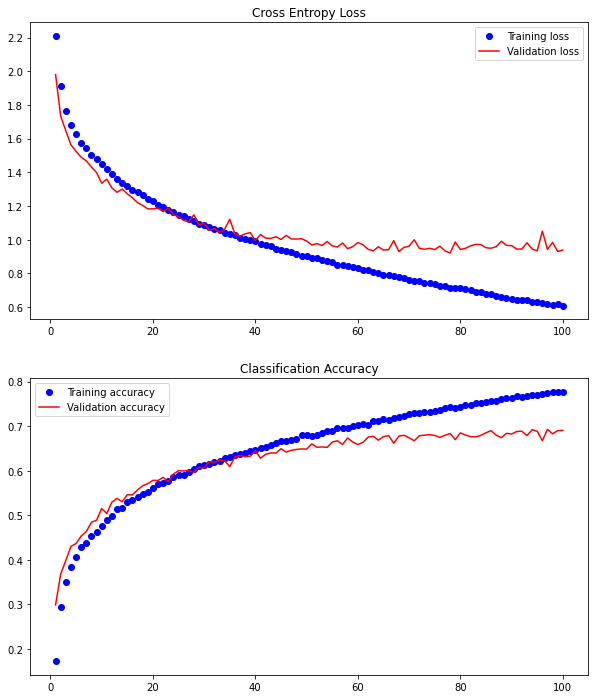

In [3]:
# Running the run_model
run_model()

In [4]:
# Evaluating the final model on the test dataset
trainX, trainY, testX, testY = prepare_data()
final_model = load_model('cifar10_basic.h5')
_, acc = final_model.evaluate(testX, testY, verbose=0)
print('>> Accuracy = %.3f' % (acc * 100.0))

>> Accuracy = 69.070
